In [4]:
import polars as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
import json

from datetime import datetime, timedelta

In [34]:
# Read parquet file
raw_df = pl.read_parquet("USDT_IDRT.parquet")

# Display the DataFrame
raw_df

coin,opentime,openprice,highprice,lowprice,closeprice,volume,closetime,quotevolume,trades,taker_buy_volume,taker_buy_quote
str,i64,f64,f64,f64,f64,f64,i64,f64,i64,f64,f64
"""USDT""",1587096000000,15603.0,15603.0,3500.0,3800.0,2111.0,1587096059999,7.9510e6,12,180.42,665115.9
"""USDT""",1587096060000,3900.0,9999.0,3121.0,9999.0,1518.8,1587096119999,8.0077e6,30,569.4,4.3036e6
"""USDT""",1587096120000,9999.0,15400.0,3121.0,15300.0,3436.21,1587096179999,4.8426e7,26,1093.32,1.5983e7
"""USDT""",1587096180000,15300.0,15399.0,3905.0,13662.0,2006.86,1587096239999,2.5022e7,20,21.7,334158.3
"""USDT""",1587096240000,13662.0,15000.0,3905.0,15000.0,1858.21,1587096299999,2.1579e7,25,473.01,6.1570e6
…,…,…,…,…,…,…,…,…,…,…,…
"""USDT""",1729727700000,15691.0,15691.0,15691.0,15691.0,0.0,1729727759999,0.0,0,0.0,0.0
"""USDT""",1729727760000,15691.0,15691.0,15691.0,15691.0,0.0,1729727819999,0.0,0,0.0,0.0
"""USDT""",1729727820000,15691.0,15691.0,15691.0,15691.0,5.0,1729727879999,78455.0,1,0.0,0.0


In [7]:
# Calculate average, IQR, and prepare for Z-scores
summary_data = []

# Select numerical columns (excluding 'opentime' and 'closetime')
numeric_columns = raw_df.columns[2:]  # Exclude 'coin', 'opentime', 'closetime'

for col in numeric_columns:
    mean = raw_df[col].mean()
    q1 = raw_df[col].quantile(0.25)
    q3 = raw_df[col].quantile(0.75)
    iqr = q3 - q1
    std = raw_df[col].std()

    # Append summary statistics to the list
    summary_data.append({
        "column": col,
        "mean": mean,
        "IQR": iqr,
    })

# Create summary DataFrame
summary_df = pl.DataFrame(summary_data)

# Calculate Z-scores and create a new DataFrame for Z-scores
z_score_data = {col: ((raw_df[col] - raw_df[col].mean()) / raw_df[col].std()).to_list() for col in numeric_columns}

# Create Z-scores DataFrame
z_scores_df = pl.DataFrame(z_score_data)

# Display the summary DataFrame
print("Summary Statistics:")
print(summary_df)

# Display the Z-scores DataFrame
print("\nZ-scores:")
print(z_scores_df)

Summary Statistics:
shape: (10, 3)
┌──────────────────┬──────────────┬───────────┐
│ column           ┆ mean         ┆ IQR       │
│ ---              ┆ ---          ┆ ---       │
│ str              ┆ f64          ┆ f64       │
╞══════════════════╪══════════════╪═══════════╡
│ openprice        ┆ 15011.614879 ┆ 1099.0    │
│ highprice        ┆ 15012.716087 ┆ 1097.0    │
│ lowprice         ┆ 15010.750935 ┆ 1098.0    │
│ closeprice       ┆ 15011.7771   ┆ 1098.0    │
│ volume           ┆ 237.893948   ┆ 15.89     │
│ closetime        ┆ 1.6584e12    ┆ 7.1290e10 │
│ quotevolume      ┆ 3.5600e6     ┆ 233209.04 │
│ trades           ┆ 1.361487     ┆ 1.0       │
│ taker_buy_volume ┆ 126.383688   ┆ 0.0       │
│ taker_buy_quote  ┆ 1.9112e6     ┆ 0.0       │
└──────────────────┴──────────────┴───────────┘

Z-scores:
shape: (2_375_396, 10)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ openprice ┆ highprice ┆ lowprice  ┆ closepric ┆ … ┆ quotevol

In [45]:
import polars as pl
import matplotlib.pyplot as plt

def plot_open_price_vs_column(df, column_name):
    """
    Plots the 'opentime' against the specified column in the DataFrame.
    
    Parameters:
        df (pl.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to plot against 'opentime'.
    """
    # Extract data for plotting
    opentime_data = df["opentime"].to_numpy()  # Convert to numpy array
    column_data = df[column_name].to_numpy()  # Convert to numpy array

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(opentime_data, column_data, marker='o')
    plt.title(f"{column_name} Over Time")
    plt.xlabel("Open Time (Milliseconds since Epoch)")
    plt.ylabel(column_name)

    # Set the x-axis limits based on the actual open time range
    plt.xlim([opentime_data.min(), opentime_data.max()])  # Set x limits to data range

    # Rotate x-axis labels for better readability (optional)
    plt.xticks(rotation=45)

    plt.grid()
    plt.tight_layout()
    plt.show()

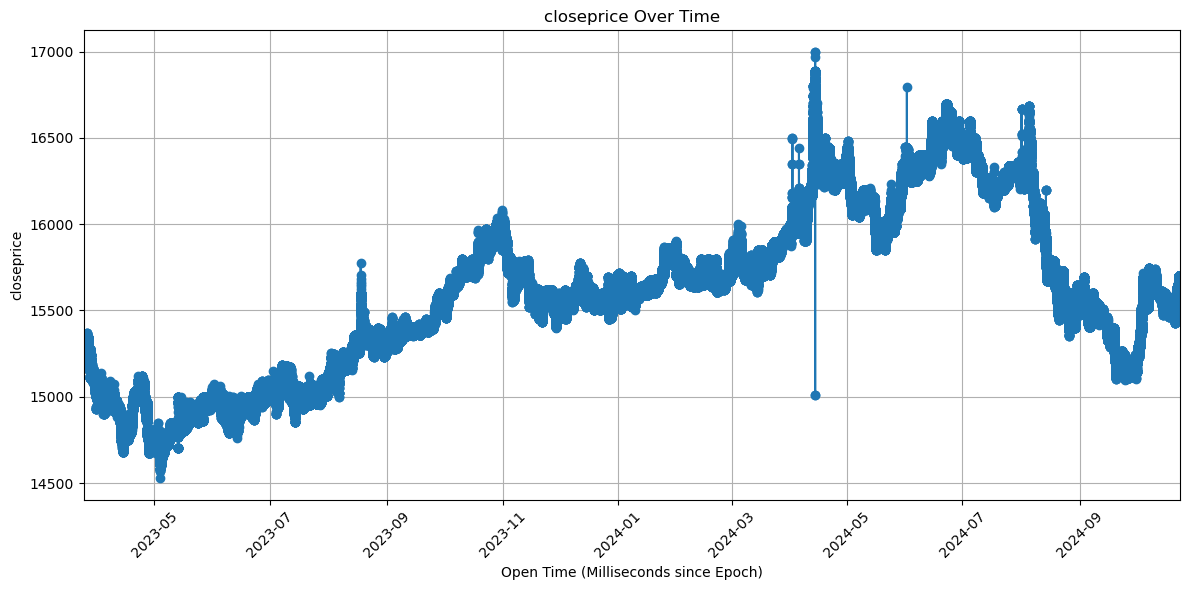

In [50]:
# ['coin',
#  'opentime',
#  'openprice',
#  'highprice',
#  'lowprice',
#  'closeprice',
#  'volume',
#  'closetime',
#  'quotevolume',
#  'trades',
#  'taker_buy_volume',
#  'taker_buy_quote']
plot_open_price_vs_column(df, "closeprice")

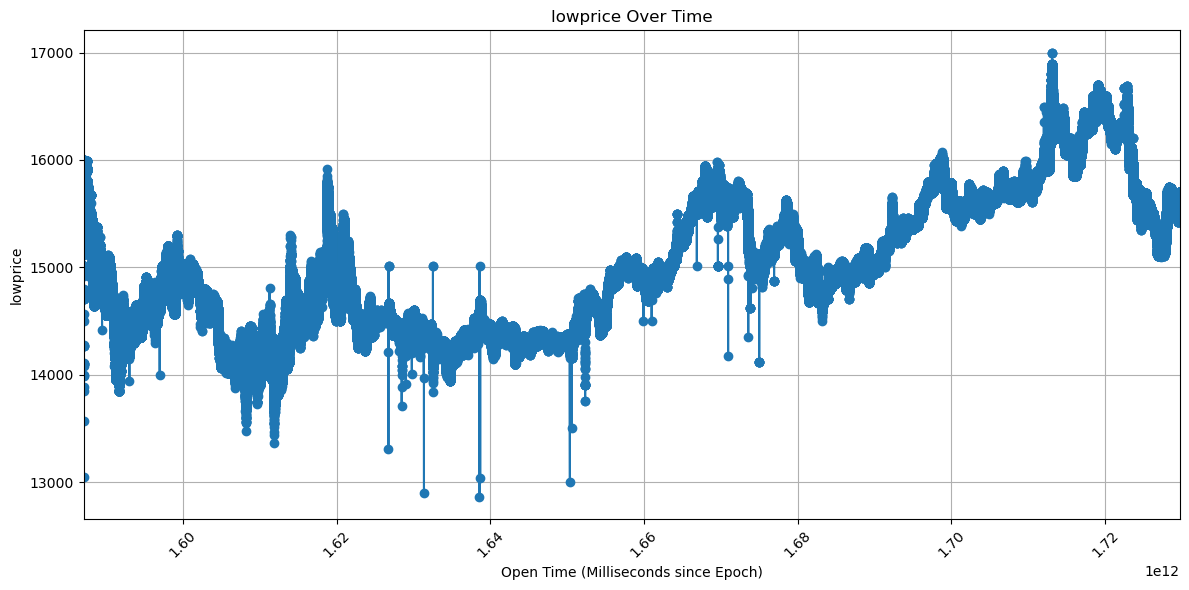

In [13]:
# ['coin',
#  'opentime',
#  'openprice',
#  'highprice',
#  'lowprice',
#  'closeprice',
#  'volume',
#  'closetime',
#  'quotevolume',
#  'trades',
#  'taker_buy_volume',
#  'taker_buy_quote']
plot_open_price_vs_column(df_averaged, "lowprice")

In [53]:
df = pl.from_pandas(df)

In [54]:
import polars as pl

# Calculate mean and IQR
def replace_outliers_with_mean(df, cols):
    for col in cols:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        
        # Calculate lower and upper bounds for outliers
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        # Calculate mean
        mean_value = df[col].mean()
        
        # Replace outliers with mean
        df = df.with_columns(
            pl.when((pl.col(col) < lower_bound) | (pl.col(col) > upper_bound))
                    .then(mean_value)
                    .otherwise(pl.col(col))
                    .alias(col)
        )
    return df

# Columns to process
columns_to_process = ['openprice', 'highprice', 'lowprice', 'closeprice']

# Replace outliers
df_averaged = replace_outliers_with_mean(df, columns_to_process)

# Display the cleaned DataFrame
df_averaged

opentime,openprice,highprice,lowprice,closeprice,volume,closetime,quotevolume,trades,taker_buy_volume,taker_buy_quote,maker_buy_volume,maker_buy_quote_volume,open_close_delta,low_high_delta,high_open_delta,close_open_ratio,sma_5,sma_10,volume_change,volume_ratio,next_closeprice,opentime_change,openprice_change,highprice_change,lowprice_change,closeprice_change,closetime_change,quotevolume_change,trades_change,taker_buy_volume_change,taker_buy_quote_change,maker_buy_volume_change,maker_buy_quote_volume_change,open_close_delta_change,low_high_delta_change,high_open_delta_change,close_open_ratio_change,sma_5_change,sma_10_change,volume_change_change,volume_ratio_change,next_closeprice_change,row_range
datetime[ns],f64,f64,f64,f64,f64,datetime[ns],f64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2023-03-24 14:01:00,15299.0,15299.0,15299.0,15299.0,69.0,2023-03-24 14:01:59.999,1.055631e6,1,69.0,1.055631e6,0.0,0.0,0.0,0.0,0.0,0.0,15264.6,15260.3,69.0,0.0,15248.0,60000.0,43.0,43.0,43.0,43.0,60000.0,1.055631e6,1.0,69.0,1.055631e6,0.0,0.0,0.0,0.0,0.0,0.0,8.6,4.3,69.0,0.0,-51.0,59.999
2023-03-24 14:02:00,15255.0,15255.0,15248.0,15248.0,120.0,2023-03-24 14:02:59.999,1.82983e6,2,0.0,0.0,120.0,1.82983e6,-7.0,7.0,0.0,-0.000459,15263.0,15259.5,51.0,0.0,15248.0,60000.0,-44.0,-44.0,-51.0,-51.0,60000.0,774199.0,1.0,-69.0,-1.055631e6,120.0,1.82983e6,-7.0,7.0,0.0,-0.000459,-1.6,-0.8,-18.0,0.0,0.0,59.999
2023-03-24 14:03:00,15248.0,15248.0,15248.0,15248.0,0.0,2023-03-24 14:03:59.999,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15261.4,15258.7,-120.0,0.0,15275.0,60000.0,-7.0,-7.0,0.0,0.0,60000.0,-1.82983e6,-2.0,0.0,0.0,-120.0,-1.82983e6,7.0,-7.0,0.0,0.000459,-1.6,-0.8,-171.0,0.0,27.0,59.999
2023-03-24 14:04:00,15275.0,15275.0,15275.0,15275.0,11.0,2023-03-24 14:04:59.999,168025.0,1,0.0,0.0,11.0,168025.0,0.0,0.0,0.0,0.0,15265.2,15260.6,11.0,0.0,15275.0,60000.0,27.0,27.0,27.0,27.0,60000.0,168025.0,1.0,0.0,0.0,11.0,168025.0,0.0,0.0,0.0,0.0,3.8,1.9,131.0,0.0,0.0,59.999
2023-03-24 14:05:00,15275.0,15275.0,15275.0,15275.0,10.0,2023-03-24 14:05:59.999,152750.0,1,0.0,0.0,10.0,152750.0,0.0,0.0,0.0,0.0,15269.0,15262.5,-1.0,0.0,15315.0,60000.0,0.0,0.0,0.0,0.0,60000.0,-15275.0,0.0,0.0,0.0,-1.0,-15275.0,0.0,0.0,0.0,0.0,3.8,1.9,-12.0,0.0,40.0,59.999
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2024-10-23 23:55:00,15691.0,15691.0,15691.0,15691.0,0.0,2024-10-23 23:55:59.999,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15691.0,15691.0,0.0,0.0,15691.0,60000.0,0.0,0.0,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.999
2024-10-23 23:56:00,15691.0,15691.0,15691.0,15691.0,0.0,2024-10-23 23:56:59.999,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15691.0,15691.0,0.0,0.0,15691.0,60000.0,0.0,0.0,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.999
2024-10-23 23:57:00,15691.0,15691.0,15691.0,15691.0,5.0,2024-10-23 23:57:59.999,78455.0,1,0.0,0.0,5.0,78455.0,0.0,0.0,0.0,0.0,15691.0,15691.0,5.0,0.0,15693.0,60000.0,0.0,0.0,0.0,0.0,60000.0,78455.0,1.0,0.0,0.0,5.0,78455.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,2.0,59.999


In [55]:
# Features engineering
df = df_averaged.with_columns([
    # Maker Buy
    (pl.col("volume") - pl.col("taker_buy_volume")).alias("maker_buy_volume"),
    (pl.col("quotevolume") - pl.col("taker_buy_quote")).alias("maker_buy_quote_volume"),

    # Price Deltas
    (pl.col("closeprice") - pl.col("openprice")).alias("open_close_delta"),
    (pl.col("highprice") - pl.col("lowprice")).alias("low_high_delta"),
    (pl.col("highprice") - pl.col("openprice")).alias("high_open_delta"),
    (pl.col("closeprice") / pl.col("openprice") - 1).alias("close_open_ratio"),
    
    # Moving Averages
    pl.col("closeprice").rolling_mean(window_size=5).alias("sma_5"),
    pl.col("closeprice").rolling_mean(window_size=10).alias("sma_10"),
    
    # Changes from lag_1
    (pl.col("volume") - pl.col("volume").shift(1)).alias("volume_change"),
    
    # Taker vs Maker Volume Ratio
    (pl.col("taker_buy_volume") / (pl.col("volume") - pl.col("taker_buy_volume"))).alias("volume_ratio"),
    
    # Lagged Features (next close and volume)
    pl.col("closeprice").shift(-1).alias("next_closeprice"),  # Next close price


])

df = df.drop(["coin"])

# Function to replace NaN and infinite values in specified columns
def replace_nan_inf(df: pl.DataFrame, col_names: list, replacement: float = 0) -> pl.DataFrame:
    for col in col_names:
        df = df.with_columns(
            pl.when(pl.col(col).is_nan() | pl.col(col).is_in([np.inf, -np.inf]))
            .then(replacement)
            .otherwise(pl.col(col)).alias(col)
        )
    return df

# List of columns to replace NaN and infinite values with 0
columns_to_replace = [
    "volume_ratio", "maker_buy_volume", "maker_buy_quote_volume",
    "open_close_delta", "low_high_delta", "high_open_delta",
    "close_open_ratio", "sma_5", "sma_10", "volume_change",
    "next_closeprice"
]

# Replace NaN and infinite values with 0 using the utility function
df = replace_nan_inf(df, columns_to_replace)

# Calculate change from previous lag for specified columns
columns_to_change = [
    'opentime','openprice', 'highprice', 'lowprice', 'closeprice', 'closetime', 'volume', 
    'quotevolume', 'trades', 'taker_buy_volume', 'taker_buy_quote', 
    'maker_buy_volume', 'maker_buy_quote_volume', 'open_close_delta', 
    'low_high_delta', 'high_open_delta', 'close_open_ratio', 
    'sma_5', 'sma_10', 'volume_change', 'volume_ratio', 
    'next_closeprice'
]

# Calculate the change and create new columns
for col in columns_to_change:
    change_col_name = f"{col}_change"
    df = df.with_columns(
        (pl.col(col) - pl.col(col).shift(1)).alias(change_col_name)  # Calculate the change
    )

# Display the updated DataFrame
df

ColumnNotFoundError: "coin" not found

Resolved plan until failure:

	---> FAILED HERE RESOLVING THIS_NODE <---
DF ["opentime", "openprice", "highprice", "lowprice"]; PROJECT */44 COLUMNS; SELECTION: None

In [37]:
# Turn polars df to pandas df
df = df.to_pandas()
df

,opentime,openprice,highprice,lowprice,closeprice,volume,closetime,quotevolume,trades,taker_buy_volume,...,maker_buy_quote_volume_change,open_close_delta_change,low_high_delta_change,high_open_delta_change,close_open_ratio_change,sma_5_change,sma_10_change,volume_change_change,volume_ratio_change,next_closeprice_change
0,1587096000000,15603.000000,15603.000000,15010.750935,15011.7771,2111.00,1587096059999,7950998.02,12,180.42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1587096060000,15011.614879,15012.716087,15010.750935,15011.7771,1518.80,1587096119999,8007685.55,30,569.40,...,-3581785.78,591.385121,-590.283913,1.101208,0.037902,NaN,NaN,NaN,0.506293,288.2229
2,1587096120000,15011.614879,15400.000000,15010.750935,15300.0000,3436.21,1587096179999,48425887.45,26,1093.32,...,28739090.86,288.222900,387.283913,387.283913,0.019200,NaN,NaN,2509.61,-0.133093,-1638.0000
3,1587096180000,15300.000000,15399.000000,15010.750935,13662.0000,2006.86,1587096239999,25022275.06,20,21.70,...,-7755070.44,-1926.385121,-1.000000,-289.385121,-0.126270,NaN,NaN,-3346.76,-0.455723,1338.0000
4,1587096240000,13662.000000,15000.000000,15010.750935,15000.0000,1858.21,1587096299999,21579335.19,25,473.01,...,-9265765.23,2976.000000,-399.000000,1239.000000,0.204995,NaN,NaN,1280.70,0.330543,-6.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2375391,1729727700000,15691.000000,15691.000000,15691.000000,15691.0000,0.00,1729727759999,0.00,0,0.00,...,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00,0.000000,0.0000
2375392,1729727760000,15691.000000,15691.000000,15691.000000,15691.0000,0.00,1729727819999,0.00,0,0.00,...,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00,0.000000,0.0000
2375393,1729727820000,15691.000000,15691.000000,15691.000000,15691.0000,5.00,1729727879999,78455.00,1,0.00,...,78455.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,5.00,0.000000,2.0000
2375394,1729727880000,15693.000000,15693.000000,15693.000000,15693.0000,5.00,1729727939999,78465.00,1,5.00,...,-78455.00,0.000000,0.000000,0.000000,0.000000,0.4,0.2,-5.00,0.000000,0.0000


In [40]:
# Assuming df['opentime'] is the column with timestamps in milliseconds
df['opentime'] = pd.to_datetime(df['opentime'], unit='ms')
df['closetime'] = pd.to_datetime(df['closetime'], unit='ms')

# Format to display in 'YYYY-MM-DD HH:MM:SS.SSS' format
df['opentime'] = df['opentime'].dt.strftime('%Y-%m-%d %H:%M:%S.%f')
df['closetime'] = df['closetime'].dt.strftime('%Y-%m-%d %H:%M:%S.%f')

df

/tmp/ipykernel_864844/2161759317.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['opentime'] = pd.to_datetime(df['opentime'], unit='ms')
/tmp/ipykernel_864844/2161759317.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['closetime'] = pd.to_datetime(df['closetime'], unit='ms')
/tmp/ipykernel_864844/2161759317.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

,opentime,openprice,highprice,lowprice,closeprice,volume,closetime,quotevolume,trades,taker_buy_volume,...,maker_buy_quote_volume_change,open_close_delta_change,low_high_delta_change,high_open_delta_change,close_open_ratio_change,sma_5_change,sma_10_change,volume_change_change,volume_ratio_change,next_closeprice_change
1541037,2023-03-24 14:01:00.000000,15299.0,15299.0,15299.0,15299.0,69.0,2023-03-24 14:01:59.999000,1055631.0,1,69.0,...,0.0,0.0,0.0,0.0,0.000000,8.6,4.3,69.0,0.0,-51.0
1541038,2023-03-24 14:02:00.000000,15255.0,15255.0,15248.0,15248.0,120.0,2023-03-24 14:02:59.999000,1829830.0,2,0.0,...,1829830.0,-7.0,7.0,0.0,-0.000459,-1.6,-0.8,-18.0,0.0,0.0
1541039,2023-03-24 14:03:00.000000,15248.0,15248.0,15248.0,15248.0,0.0,2023-03-24 14:03:59.999000,0.0,0,0.0,...,-1829830.0,7.0,-7.0,0.0,0.000459,-1.6,-0.8,-171.0,0.0,27.0
1541040,2023-03-24 14:04:00.000000,15275.0,15275.0,15275.0,15275.0,11.0,2023-03-24 14:04:59.999000,168025.0,1,0.0,...,168025.0,0.0,0.0,0.0,0.000000,3.8,1.9,131.0,0.0,0.0
1541041,2023-03-24 14:05:00.000000,15275.0,15275.0,15275.0,15275.0,10.0,2023-03-24 14:05:59.999000,152750.0,1,0.0,...,-15275.0,0.0,0.0,0.0,0.000000,3.8,1.9,-12.0,0.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2375391,2024-10-23 23:55:00.000000,15691.0,15691.0,15691.0,15691.0,0.0,2024-10-23 23:55:59.999000,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2375392,2024-10-23 23:56:00.000000,15691.0,15691.0,15691.0,15691.0,0.0,2024-10-23 23:56:59.999000,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2375393,2024-10-23 23:57:00.000000,15691.0,15691.0,15691.0,15691.0,5.0,2024-10-23 23:57:59.999000,78455.0,1,0.0,...,78455.0,0.0,0.0,0.0,0.000000,0.0,0.0,5.0,0.0,2.0
2375394,2024-10-23 23:58:00.000000,15693.0,15693.0,15693.0,15693.0,5.0,2024-10-23 23:58:59.999000,78465.0,1,5.0,...,-78455.0,0.0,0.0,0.0,0.000000,0.4,0.2,-5.0,0.0,0.0


In [41]:
import pandas as pd

# Convert opentime and closetime to datetime
df['opentime'] = pd.to_datetime(df['opentime'])
df['closetime'] = pd.to_datetime(df['closetime'])

# Calculate the difference and add it as a new column
df['row_range'] = (df['closetime'] - df['opentime']).dt.total_seconds()

df

/tmp/ipykernel_864844/2314568084.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['opentime'] = pd.to_datetime(df['opentime'])
/tmp/ipykernel_864844/2314568084.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['closetime'] = pd.to_datetime(df['closetime'])
/tmp/ipykernel_864844/2314568084.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

,opentime,openprice,highprice,lowprice,closeprice,volume,closetime,quotevolume,trades,taker_buy_volume,...,open_close_delta_change,low_high_delta_change,high_open_delta_change,close_open_ratio_change,sma_5_change,sma_10_change,volume_change_change,volume_ratio_change,next_closeprice_change,row_range
1541037,2023-03-24 14:01:00,15299.0,15299.0,15299.0,15299.0,69.0,2023-03-24 14:01:59.999,1055631.0,1,69.0,...,0.0,0.0,0.0,0.000000,8.6,4.3,69.0,0.0,-51.0,59.999
1541038,2023-03-24 14:02:00,15255.0,15255.0,15248.0,15248.0,120.0,2023-03-24 14:02:59.999,1829830.0,2,0.0,...,-7.0,7.0,0.0,-0.000459,-1.6,-0.8,-18.0,0.0,0.0,59.999
1541039,2023-03-24 14:03:00,15248.0,15248.0,15248.0,15248.0,0.0,2023-03-24 14:03:59.999,0.0,0,0.0,...,7.0,-7.0,0.0,0.000459,-1.6,-0.8,-171.0,0.0,27.0,59.999
1541040,2023-03-24 14:04:00,15275.0,15275.0,15275.0,15275.0,11.0,2023-03-24 14:04:59.999,168025.0,1,0.0,...,0.0,0.0,0.0,0.000000,3.8,1.9,131.0,0.0,0.0,59.999
1541041,2023-03-24 14:05:00,15275.0,15275.0,15275.0,15275.0,10.0,2023-03-24 14:05:59.999,152750.0,1,0.0,...,0.0,0.0,0.0,0.000000,3.8,1.9,-12.0,0.0,40.0,59.999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2375391,2024-10-23 23:55:00,15691.0,15691.0,15691.0,15691.0,0.0,2024-10-23 23:55:59.999,0.0,0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,59.999
2375392,2024-10-23 23:56:00,15691.0,15691.0,15691.0,15691.0,0.0,2024-10-23 23:56:59.999,0.0,0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,59.999
2375393,2024-10-23 23:57:00,15691.0,15691.0,15691.0,15691.0,5.0,2024-10-23 23:57:59.999,78455.0,1,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,5.0,0.0,2.0,59.999
2375394,2024-10-23 23:58:00,15693.0,15693.0,15693.0,15693.0,5.0,2024-10-23 23:58:59.999,78465.0,1,5.0,...,0.0,0.0,0.0,0.000000,0.4,0.2,-5.0,0.0,0.0,59.999


In [42]:
df['row_range'].unique()

array([59.999])

In [43]:
df[df['row_range'] != 59.999]

,opentime,openprice,highprice,lowprice,closeprice,volume,closetime,quotevolume,trades,taker_buy_volume,...,open_close_delta_change,low_high_delta_change,high_open_delta_change,close_open_ratio_change,sma_5_change,sma_10_change,volume_change_change,volume_ratio_change,next_closeprice_change,row_range


In [22]:
# Get the indices where 'row_range' is not equal to 59.999
indices = df[df['row_range'] != 59.999].index

# Initialize an empty DataFrame to hold the result
result = pd.DataFrame()

# Loop through each index and get the previous, current, and next rows
for idx in indices:
    result = pd.concat([result, df.loc[idx - 1: idx + 1]])

# Display the result
result

,opentime,openprice,highprice,lowprice,closeprice,volume,closetime,quotevolume,trades,taker_buy_volume,...,open_close_delta_change,low_high_delta_change,high_open_delta_change,close_open_ratio_change,sma_5_change,sma_10_change,volume_change_change,volume_ratio_change,next_closeprice_change,row_range
357286,2020-12-21 13:46:00,14211.0,14211.0,14211.0,14211.0,367.36,2020-12-21 13:46:59.999,5220552.96,1,0.00,...,0.0,0.0,0.0,0.000000,-5.4,0.0,361.28,0.000000,0.0,59.999
357287,2020-12-21 13:47:00,14211.0,14211.0,14211.0,14211.0,0.00,2020-12-21 13:47:23.522,0.00,0,0.00,...,0.0,0.0,0.0,0.000000,0.0,0.0,-731.68,0.000000,31.0,23.522
357288,2020-12-21 18:00:00,14238.0,14242.0,14238.0,14242.0,1215.59,2020-12-21 18:00:59.999,17309901.15,10,1215.59,...,4.0,4.0,4.0,0.000281,6.2,3.1,1582.95,0.000000,-27.0,59.999
431247,2021-02-11 03:39:00,14355.0,14355.0,14355.0,14355.0,0.00,2021-02-11 03:39:59.999,0.00,0,0.00,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,59.999
431248,2021-02-11 03:40:00,14355.0,14355.0,14355.0,14355.0,0.00,2021-02-11 03:40:58.580,0.00,0,0.00,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,58.580
431249,2021-02-11 05:00:00,14355.0,14355.0,14355.0,14355.0,3.60,2021-02-11 05:00:59.999,51678.00,2,0.00,...,0.0,0.0,0.0,0.000000,0.0,0.0,3.60,0.000000,0.0,59.999
536069,2021-04-25 04:00:00,15257.0,15257.0,15257.0,15257.0,0.00,2021-04-25 04:00:59.999,0.00,0,0.00,...,0.0,0.0,0.0,0.000000,1.0,0.5,67.92,0.000000,0.0,59.999
536070,2021-04-25 04:01:00,15257.0,15257.0,15257.0,15257.0,0.00,2021-04-25 04:01:02.290,0.00,0,0.00,...,0.0,0.0,0.0,0.000000,0.0,2.0,0.00,0.000000,0.0,2.290
536071,2021-04-25 08:45:00,15239.0,15257.0,15239.0,15257.0,108.11,2021-04-25 08:45:59.999,1647594.13,2,5.88,...,18.0,18.0,18.0,0.001181,0.6,0.4,108.11,0.057517,0.0,59.999
694064,2021-08-13 01:58:00,14410.0,14410.0,14410.0,14410.0,21.06,2021-08-13 01:58:59.999,303474.60,1,21.06,...,0.0,0.0,0.0,0.000000,6.0,4.2,21.06,0.000000,0.0,59.999


In [44]:
df[df['opentime_change'] != 60000]

,opentime,openprice,highprice,lowprice,closeprice,volume,closetime,quotevolume,trades,taker_buy_volume,...,open_close_delta_change,low_high_delta_change,high_open_delta_change,close_open_ratio_change,sma_5_change,sma_10_change,volume_change_change,volume_ratio_change,next_closeprice_change,row_range


In [25]:
# Get the indices where 'row_range' is not equal to 59.999
indices = df[df['opentime_change'] != 60000].index

# Initialize an empty DataFrame to hold the result
result = pd.DataFrame()

# Loop through each index and get the previous, current, and next rows
for idx in indices:
    result = pd.concat([result, df.loc[idx - 1: idx]])

# Display the result
result

,opentime,openprice,highprice,lowprice,closeprice,volume,closetime,quotevolume,trades,taker_buy_volume,...,open_close_delta_change,low_high_delta_change,high_open_delta_change,close_open_ratio_change,sma_5_change,sma_10_change,volume_change_change,volume_ratio_change,next_closeprice_change,row_range
0,2020-04-17 04:00:00,15603.0,15603.0,15010.750935,15011.7771,2111.00,2020-04-17 04:00:59.999,7950998.02,12,180.42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.999
11399,2020-04-25 01:59:00,15509.0,15509.0,15509.000000,15509.0000,0.00,2020-04-25 01:59:59.999,0.00,0,0.00,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,59.999
11400,2020-04-25 04:30:00,15509.0,15509.0,15509.000000,15509.0000,0.00,2020-04-25 04:30:59.999,0.00,0,0.00,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,59.999
103409,2020-06-28 01:59:00,14572.0,14572.0,14572.000000,14572.0000,0.00,2020-06-28 01:59:59.999,0.00,0,0.00,...,0.0,0.0,0.0,0.000000,15.8,7.2,1066.03,0.000000,0.0,59.999
103410,2020-06-28 05:30:00,14572.0,14572.0,14572.000000,14572.0000,0.00,2020-06-28 05:30:59.999,0.00,0,0.00,...,0.0,0.0,0.0,0.000000,15.8,7.2,0.00,0.000000,0.0,59.999
326639,2020-11-30 05:59:00,14158.0,14158.0,14158.000000,14158.0000,0.00,2020-11-30 05:59:59.999,0.00,0,0.00,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,59.999
326640,2020-11-30 07:00:00,14158.0,14158.0,14158.000000,14158.0000,0.00,2020-11-30 07:00:59.999,0.00,0,0.00,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.000000,27.0,59.999
357287,2020-12-21 13:47:00,14211.0,14211.0,14211.000000,14211.0000,0.00,2020-12-21 13:47:23.522,0.00,0,0.00,...,0.0,0.0,0.0,0.000000,0.0,0.0,-731.68,0.000000,31.0,23.522
357288,2020-12-21 18:00:00,14238.0,14242.0,14238.000000,14242.0000,1215.59,2020-12-21 18:00:59.999,17309901.15,10,1215.59,...,4.0,4.0,4.0,0.000281,6.2,3.1,1582.95,0.000000,-27.0,59.999
362087,2020-12-25 01:59:00,14323.0,14323.0,14323.000000,14323.0000,0.00,2020-12-25 01:59:59.999,0.00,0,0.00,...,-23.0,-23.0,-23.0,-0.001608,3.2,1.6,-224.24,-0.475263,0.0,59.999


In [38]:
df = df.loc[1541037:]
df

,opentime,openprice,highprice,lowprice,closeprice,volume,closetime,quotevolume,trades,taker_buy_volume,...,maker_buy_quote_volume_change,open_close_delta_change,low_high_delta_change,high_open_delta_change,close_open_ratio_change,sma_5_change,sma_10_change,volume_change_change,volume_ratio_change,next_closeprice_change
1541037,1679666460000,15299.0,15299.0,15299.0,15299.0,69.0,1679666519999,1055631.0,1,69.0,...,0.0,0.0,0.0,0.0,0.000000,8.6,4.3,69.0,0.0,-51.0
1541038,1679666520000,15255.0,15255.0,15248.0,15248.0,120.0,1679666579999,1829830.0,2,0.0,...,1829830.0,-7.0,7.0,0.0,-0.000459,-1.6,-0.8,-18.0,0.0,0.0
1541039,1679666580000,15248.0,15248.0,15248.0,15248.0,0.0,1679666639999,0.0,0,0.0,...,-1829830.0,7.0,-7.0,0.0,0.000459,-1.6,-0.8,-171.0,0.0,27.0
1541040,1679666640000,15275.0,15275.0,15275.0,15275.0,11.0,1679666699999,168025.0,1,0.0,...,168025.0,0.0,0.0,0.0,0.000000,3.8,1.9,131.0,0.0,0.0
1541041,1679666700000,15275.0,15275.0,15275.0,15275.0,10.0,1679666759999,152750.0,1,0.0,...,-15275.0,0.0,0.0,0.0,0.000000,3.8,1.9,-12.0,0.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2375391,1729727700000,15691.0,15691.0,15691.0,15691.0,0.0,1729727759999,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2375392,1729727760000,15691.0,15691.0,15691.0,15691.0,0.0,1729727819999,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2375393,1729727820000,15691.0,15691.0,15691.0,15691.0,5.0,1729727879999,78455.0,1,0.0,...,78455.0,0.0,0.0,0.0,0.000000,0.0,0.0,5.0,0.0,2.0
2375394,1729727880000,15693.0,15693.0,15693.0,15693.0,5.0,1729727939999,78465.0,1,5.0,...,-78455.0,0.0,0.0,0.0,0.000000,0.4,0.2,-5.0,0.0,0.0


In [39]:
df[df['row_range'] != 59.999]

KeyError: 'row_range'

In [32]:
df[df['opentime_change'] != 60000]

,opentime,openprice,highprice,lowprice,closeprice,volume,closetime,quotevolume,trades,taker_buy_volume,...,open_close_delta_change,low_high_delta_change,high_open_delta_change,close_open_ratio_change,sma_5_change,sma_10_change,volume_change_change,volume_ratio_change,next_closeprice_change,row_range


In [194]:
# Drop rows where 'opentime_change' is not equal to 60000
df = df.filter(pl.col("opentime_change") == 60000)

df = df.filter(pl.col("closetime_change") == 60000)

df

 Number of row dropped: 10


opentime,openprice,highprice,lowprice,closeprice,volume,closetime,quotevolume,trades,taker_buy_volume,taker_buy_quote,maker_buy_volume,maker_buy_quote_volume,open_close_delta,low_high_delta,high_open_delta,close_open_ratio,sma_5,sma_10,volume_change,volume_ratio,next_closeprice,opentime_change,openprice_change,highprice_change,lowprice_change,closeprice_change,closetime_change,quotevolume_change,trades_change,taker_buy_volume_change,taker_buy_quote_change,maker_buy_volume_change,maker_buy_quote_volume_change,open_close_delta_change,low_high_delta_change,high_open_delta_change,close_open_ratio_change,sma_5_change,sma_10_change,volume_change_change,volume_ratio_change,next_closeprice_change
i64,f64,f64,f64,f64,f64,i64,f64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,f64,f64,f64,f64,i64,f64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1587096600000,12900.0,15000.0,8000.0,8000.0,1584.33,1587096659999,2.0138e7,29,930.78,1.2430e7,653.55,7.7084e6,-4900.0,7000.0,2100.0,-0.379845,12350.0,13070.5,-1636.21,1.424191,14892.0,60000,4899.0,1450.0,-1.0,-4900.0,60000,-2.1873e7,-8,-1205.77,-1.5740e7,-430.44,-6.1325e6,-9799.0,1451.0,-3449.0,-0.992143,-1398.8,420.0,-2994.64,-0.546814,6892.0
1587096660000,8005.0,14894.0,8005.0,14892.0,1659.71,1587096719999,2.1179e7,20,683.71,1.0004e7,976.0,1.1175e7,6887.0,6889.0,6889.0,0.860337,12559.2,13559.8,75.38,0.700523,14101.0,60000,-4895.0,-106.0,5.0,6892.0,60000,1.0411e6,-9,-247.07,-2.4253e6,322.45,3.4665e6,11787.0,-111.0,4789.0,1.240182,209.2,489.3,1711.59,-0.723668,-791.0
1587096720000,13988.0,14800.0,13988.0,14101.0,1174.44,1587096779999,1.7111e7,21,626.66,9.2604e6,547.78,7.8505e6,113.0,812.0,812.0,0.008078,12665.6,13439.9,-485.27,1.143999,14101.0,60000,5983.0,-94.0,5983.0,-791.0,60000,-4.0682e6,1,-57.05,-743803.75,-428.22,-3.3244e6,-6774.0,-6077.0,-6077.0,-0.852259,106.4,-119.9,-560.65,0.443477,0.0
1587096780000,14102.0,14707.0,14101.0,14101.0,1217.85,1587096839999,1.7320e7,19,428.83,6.0469e6,789.02,1.1273e7,-1.0,606.0,605.0,-0.000071,12798.8,13483.8,43.41,0.543497,14101.0,60000,114.0,-93.0,113.0,0.0,60000,209237.08,-2,-197.83,-3.2135e6,241.24,3.4227e6,-114.0,-206.0,-207.0,-0.008149,133.2,43.9,528.68,-0.600502,0.0
1587096840000,14101.0,14101.0,13846.0,14101.0,922.44,1587096899999,1.2968e7,14,555.22,7.8291e6,367.22,5.1385e6,0.0,255.0,0.0,0.0,13039.0,13393.9,-295.41,1.511955,10526.0,60000,-1.0,-606.0,-255.0,0.0,60000,-4.3524e6,-5,126.39,1.7822e6,-421.8,-6.1346e6,1.0,-351.0,-605.0,0.000071,240.2,-89.9,-338.82,0.968458,-3575.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1729727640000,15691.0,15691.0,15691.0,15691.0,0.0,1729727699999,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15691.0,15691.0,0.0,0.0,15691.0,60000,0.0,0.0,0.0,0.0,60000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1729727700000,15691.0,15691.0,15691.0,15691.0,0.0,1729727759999,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15691.0,15691.0,0.0,0.0,15691.0,60000,0.0,0.0,0.0,0.0,60000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1729727760000,15691.0,15691.0,15691.0,15691.0,0.0,1729727819999,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15691.0,15691.0,0.0,0.0,15691.0,60000,0.0,0.0,0.0,0.0,60000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [186]:
 # Original number of rows
original_row_count = df.height

# Clean the DataFrame by dropping null values
df_cleaned = df.drop_nulls()

# Number of rows after cleaning
cleaned_row_count = df_cleaned.height

# Count of dropped rows
dropped_row_count = original_row_count - cleaned_row_count

# Display the count of dropped rows
print(f" Number of row dropped: {dropped_row_count}")
      
df_cleaned

 Number of row dropped: 10


opentime,openprice,highprice,lowprice,closeprice,volume,closetime,quotevolume,trades,taker_buy_volume,taker_buy_quote,maker_buy_volume,maker_buy_quote_volume,open_close_delta,low_high_delta,high_open_delta,close_open_ratio,sma_5,sma_10,volume_change,volume_ratio,next_closeprice,opentime_change,openprice_change,highprice_change,lowprice_change,closeprice_change,closetime_change,quotevolume_change,trades_change,taker_buy_volume_change,taker_buy_quote_change,maker_buy_volume_change,maker_buy_quote_volume_change,open_close_delta_change,low_high_delta_change,high_open_delta_change,close_open_ratio_change,sma_5_change,sma_10_change,volume_change_change,volume_ratio_change,next_closeprice_change
i64,f64,f64,f64,f64,f64,i64,f64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,f64,f64,f64,f64,i64,f64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1587096600000,12900.0,15000.0,8000.0,8000.0,1584.33,1587096659999,2.0138e7,29,930.78,1.2430e7,653.55,7.7084e6,-4900.0,7000.0,2100.0,-0.379845,12350.0,13070.5,-1636.21,1.424191,14892.0,60000,4899.0,1450.0,-1.0,-4900.0,60000,-2.1873e7,-8,-1205.77,-1.5740e7,-430.44,-6.1325e6,-9799.0,1451.0,-3449.0,-0.992143,-1398.8,420.0,-2994.64,-0.546814,6892.0
1587096660000,8005.0,14894.0,8005.0,14892.0,1659.71,1587096719999,2.1179e7,20,683.71,1.0004e7,976.0,1.1175e7,6887.0,6889.0,6889.0,0.860337,12559.2,13559.8,75.38,0.700523,14101.0,60000,-4895.0,-106.0,5.0,6892.0,60000,1.0411e6,-9,-247.07,-2.4253e6,322.45,3.4665e6,11787.0,-111.0,4789.0,1.240182,209.2,489.3,1711.59,-0.723668,-791.0
1587096720000,13988.0,14800.0,13988.0,14101.0,1174.44,1587096779999,1.7111e7,21,626.66,9.2604e6,547.78,7.8505e6,113.0,812.0,812.0,0.008078,12665.6,13439.9,-485.27,1.143999,14101.0,60000,5983.0,-94.0,5983.0,-791.0,60000,-4.0682e6,1,-57.05,-743803.75,-428.22,-3.3244e6,-6774.0,-6077.0,-6077.0,-0.852259,106.4,-119.9,-560.65,0.443477,0.0
1587096780000,14102.0,14707.0,14101.0,14101.0,1217.85,1587096839999,1.7320e7,19,428.83,6.0469e6,789.02,1.1273e7,-1.0,606.0,605.0,-0.000071,12798.8,13483.8,43.41,0.543497,14101.0,60000,114.0,-93.0,113.0,0.0,60000,209237.08,-2,-197.83,-3.2135e6,241.24,3.4227e6,-114.0,-206.0,-207.0,-0.008149,133.2,43.9,528.68,-0.600502,0.0
1587096840000,14101.0,14101.0,13846.0,14101.0,922.44,1587096899999,1.2968e7,14,555.22,7.8291e6,367.22,5.1385e6,0.0,255.0,0.0,0.0,13039.0,13393.9,-295.41,1.511955,10526.0,60000,-1.0,-606.0,-255.0,0.0,60000,-4.3524e6,-5,126.39,1.7822e6,-421.8,-6.1346e6,1.0,-351.0,-605.0,0.000071,240.2,-89.9,-338.82,0.968458,-3575.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1729727640000,15691.0,15691.0,15691.0,15691.0,0.0,1729727699999,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15691.0,15691.0,0.0,0.0,15691.0,60000,0.0,0.0,0.0,0.0,60000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1729727700000,15691.0,15691.0,15691.0,15691.0,0.0,1729727759999,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15691.0,15691.0,0.0,0.0,15691.0,60000,0.0,0.0,0.0,0.0,60000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1729727760000,15691.0,15691.0,15691.0,15691.0,0.0,1729727819999,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15691.0,15691.0,0.0,0.0,15691.0,60000,0.0,0.0,0.0,0.0,60000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [195]:
df['opentime_change'].unique()

opentime_change
i64
60000


In [196]:
# # Calculate the frequency of unique values in the 'opentime_change' column
# opentime_change_frequency = df.group_by("opentime_change").agg(
#     pl.count().alias("frequency")
# ).sort("opentime_change")

# # Display the result
# print(opentime_change_frequency)

shape: (1, 2)
┌─────────────────┬───────────┐
│ opentime_change ┆ frequency │
│ ---             ┆ ---       │
│ i64             ┆ u32       │
╞═════════════════╪═══════════╡
│ 60000           ┆ 2375378   │
└─────────────────┴───────────┘


C:\Users\pc\AppData\Local\Temp\ipykernel_11596\2192345708.py:3: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  pl.count().alias("frequency")


In [198]:
# # Calculate the frequency of unique values in the 'closetime_change' column
# closetime_change_frequency = df.group_by("closetime_change").agg(
#     pl.count().alias("frequency")
# ).sort("closetime_change")

# # Display the result
# print(closetime_change_frequency)

shape: (1, 2)
┌──────────────────┬───────────┐
│ closetime_change ┆ frequency │
│ ---              ┆ ---       │
│ i64              ┆ u32       │
╞══════════════════╪═══════════╡
│ 60000            ┆ 2375378   │
└──────────────────┴───────────┘


C:\Users\pc\AppData\Local\Temp\ipykernel_11596\2994949304.py:3: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  pl.count().alias("frequency")


In [45]:
# # To findout which columns has null value

# # Assuming df is your DataFrame
# # Get null counts for each column
# null_counts = df.null_count()

# # Create a list of column names that have null values
# null_column_names = null_counts.select(pl.col("*") > 0).columns

# # Filter to get names of columns with nulls
# null_column_names = [col for col in null_counts.columns if null_counts[col][0] > 0]

# # Display the names of columns that have null values
# print(null_column_names)

In [138]:
# Selecting feature for the model
features = [
    "openprice", 
    "highprice", 
    "lowprice", 
    "closeprice", 
    "volume", 
    "volume_ratio", 
    "open_close_delta", 
    "low_high_delta", 
    "sma_5", 
    "sma_10", 
    "close_open_ratio", 
    "closeprice_lag_-1" 
]

# Create a new DataFrame with selected features
df_features = df_cleaned.select(features)

# Display the new DataFrame with selected features
df_features

openprice,highprice,lowprice,closeprice,volume,volume_ratio,open_close_delta,low_high_delta,sma_5,sma_10,close_open_ratio,closeprice_lag_-1
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
8001.0,13550.0,8001.0,12900.0,3220.54,1.971005,4899.0,5549.0,13748.8,12650.5,0.612298,8000.0
12900.0,15000.0,8000.0,8000.0,1584.33,1.424191,-4900.0,7000.0,12350.0,13070.5,-0.379845,14892.0
8005.0,14894.0,8005.0,14892.0,1659.71,0.700523,6887.0,6889.0,12559.2,13559.8,0.860337,14101.0
13988.0,14800.0,13988.0,14101.0,1174.44,1.143999,113.0,812.0,12665.6,13439.9,0.008078,14101.0
14102.0,14707.0,14101.0,14101.0,1217.85,0.543497,-1.0,606.0,12798.8,13483.8,-0.000071,14101.0
…,…,…,…,…,…,…,…,…,…,…,…
15691.0,15691.0,15691.0,15691.0,0.0,0.0,0.0,0.0,15691.0,15691.0,0.0,15691.0
15691.0,15691.0,15691.0,15691.0,0.0,0.0,0.0,0.0,15691.0,15691.0,0.0,15691.0
15691.0,15691.0,15691.0,15691.0,0.0,0.0,0.0,0.0,15691.0,15691.0,0.0,15691.0


In [139]:
# Calculate the mean of each column
column_means = df_features.select([pl.col(col).mean().alias(col) for col in df_features.columns])

# Calculate the correlation of each column with closeprice_lag_-1
correlation_with_target = df_features.select([
    pl.corr(pl.col(col), pl.col("closeprice_lag_-1")).alias(f"corr_with_{col}") for col in df_features.columns if col != "closeprice_lag_-1"
])

# Display results
print("Column Means:")
print(column_means)

print("\nCorrelation with closeprice_lag_-1:")
print(correlation_with_target)

Column Means:
shape: (1, 12)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ openprice ┆ highprice ┆ lowprice  ┆ closepric ┆ … ┆ sma_5     ┆ sma_10    ┆ close_ope ┆ closepri │
│ ---       ┆ ---       ┆ ---       ┆ e         ┆   ┆ ---       ┆ ---       ┆ n_ratio   ┆ ce_lag_- │
│ f64       ┆ f64       ┆ f64       ┆ ---       ┆   ┆ f64       ┆ f64       ┆ ---       ┆ 1        │
│           ┆           ┆           ┆ f64       ┆   ┆           ┆           ┆ f64       ┆ ---      │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ f64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 15011.630 ┆ 15012.718 ┆ 15010.788 ┆ 15011.785 ┆ … ┆ 15011.784 ┆ 15011.782 ┆ 0.000011  ┆ 15011.78 │
│ 46        ┆ 454       ┆ 642       ┆ 865       ┆   ┆ 199       ┆ 059       ┆           ┆ 7041     │
└───────────┴───────────┴───────────┴───────────┴───┴─────────

In [140]:
correlation_with_target

corr_with_openprice,corr_with_highprice,corr_with_lowprice,corr_with_closeprice,corr_with_volume,corr_with_volume_ratio,corr_with_open_close_delta,corr_with_low_high_delta,corr_with_sma_5,corr_with_sma_10,corr_with_close_open_ratio
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0.994426,0.99447,0.994265,0.99616,-0.007737,-0.003274,0.055323,0.028604,0.995585,0.995764,0.052441


In [141]:
# Part 1: Import Libraries and Prepare Data

import polars as pl
import torch

# Load or define your DataFrame (df_features) here
# Example: df_features = pl.read_csv("your_data.csv")

# Features and target
X = df_features.select(pl.all().exclude("closeprice_lag_-1"))  # All columns except the target
y = df_features["closeprice_lag_-1"]  # Target variable

# Convert to NumPy and then to tensors
X_tensor = torch.tensor(X.to_numpy(), dtype=torch.float32)
y_tensor = torch.tensor(y.to_numpy(), dtype=torch.float32)

In [142]:
# Part 2: Split Data into Training and Validation Sets

# Set a random seed for reproducibility
torch.manual_seed(0)

# Determine the number of samples
num_samples = X_tensor.shape[0]
train_size = int(0.8 * num_samples)

# Shuffle the indices
indices = torch.randperm(num_samples)

# Split indices for training and validation
train_indices = indices[:train_size]
val_indices = indices[train_size:]

# Create training and validation sets
X_train, y_train = X_tensor[train_indices], y_tensor[train_indices]
X_val, y_val = X_tensor[val_indices], y_tensor[val_indices]

# Display the shapes of the training and validation sets
print(f"Training set shape: {X_train.shape}, Validation set shape: {X_val.shape}")

Training set shape: torch.Size([1900308, 11]), Validation set shape: torch.Size([475078, 11])


In [143]:
# Part 3: Define the Model

import torch.nn as nn

class SimpleModel(nn.Module):
    def __init__(self, input_size):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)  # First layer
        self.fc2 = nn.Linear(64, 32)           # Second layer
        self.fc3 = nn.Linear(32, 1)            # Output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))            # Activation function
        x = torch.relu(self.fc2(x))            # Activation function
        x = self.fc3(x)                        # Output
        return x

# Initialize the model
input_size = X_train.shape[1]  # Number of features
model = SimpleModel(input_size)

In [144]:
# Part 4: Define Loss Function and Optimizer

# Loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error for regression
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

In [147]:
# Part 5: Training Loop

num_epochs = 150  # Number of epochs

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode

    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs.squeeze(), y_train)  # Compute loss

    # Backward pass and optimization
    optimizer.zero_grad()  # Clear gradients
    loss.backward()        # Backpropagation
    optimizer.step()       # Update weights

    if (epoch + 1) % 10 == 0:  # Print loss every 10 epochs
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/150], Loss: 3936.2336
Epoch [20/150], Loss: 3399.1956
Epoch [30/150], Loss: 3508.8665
Epoch [40/150], Loss: 3413.2126
Epoch [50/150], Loss: 3321.0312
Epoch [60/150], Loss: 3282.2817
Epoch [70/150], Loss: 3265.2192
Epoch [80/150], Loss: 3252.1448
Epoch [90/150], Loss: 3239.6038
Epoch [100/150], Loss: 3227.5654
Epoch [110/150], Loss: 3216.0942
Epoch [120/150], Loss: 3205.4812
Epoch [130/150], Loss: 3195.6250
Epoch [140/150], Loss: 3186.2170
Epoch [150/150], Loss: 3177.2227


In [148]:
# Part 6: Validation

# Evaluate the model
model.eval()  # Set the model to evaluation mode
with torch.no_grad():  # Disable gradient calculation
    val_outputs = model(X_val)
    val_loss = criterion(val_outputs.squeeze(), y_val)

# Calculate RMSE
rmse = torch.sqrt(val_loss)
average_closeprice = y_val.mean()  # Get the average of the target closeprice in validation data
percentage_loss = (rmse / average_closeprice) * 100  # Calculate the loss as a percentage of the average closeprice

print(f'Validation Loss: {val_loss.item():.4f}')
print(f'RMSE: {rmse.item():.4f}')
print(f'Percentage Loss (RMSE relative to avg closeprice): {percentage_loss.item():.2f}%')

Validation Loss: 229.0702
RMSE: 15.1351
Percentage Loss (RMSE relative to avg closeprice): 0.10%
